# **Modelo para Classificação de Roupas**

## Importação de bibliotecas

In [1]:
import tensorflow
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np

## Importação do dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

4431872/4422102 [==============================] - 0s 0us/step


##Exploração dos dados

In [3]:
imagens_treino.shape #Dimensões do dataset de treino

(60000, 28, 28)

In [4]:
imagens_teste.shape #Dimensões do dataset de teste

(10000, 28, 28)

Text(0.5, 1.0, '9')

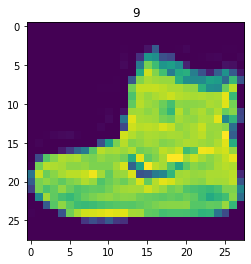

In [5]:
plt.imshow(imagens_treino[0]) #Visualização da primeira imagem do dataset de treino
plt.title(identificacoes_treino[0]) #Índice do tipo de roupa

In [6]:
nome_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota'] #Tradução do índice do tipo de roupa

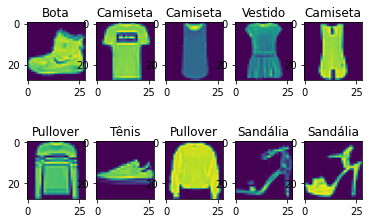

In [7]:
#Laço para mostrar 10 imagens do dataset de treino
for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nome_de_classificacoes[identificacoes_treino[imagem]])

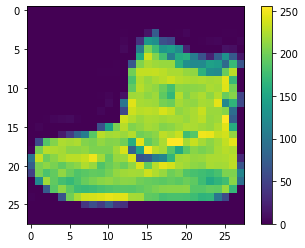

In [8]:
#Exibindo a gradação de cores da imagem
plt.imshow(imagens_treino[0])
plt.colorbar()

## Criando o modelo

In [9]:
imagens_treino = imagens_treino / 255.0 #Normalizando os dados

In [32]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #entrada
    keras.layers.Dense(256, activation=tensorflow.nn.relu), #processamento
    keras.layers.Dropout(0.2), #taxa de neurônios que ficarão 'dormentes'
    keras.layers.Dense(10, activation=tensorflow.nn.softmax) #saída
])

adam = keras.optimizers.Adam(lr=0.002 #learning rate --> velocidade de aprendizagem do modelo
                            )

callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss'),
             keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5',
                                             monitor='val_loss',
                                             save_best_only=True)]

modelo.compile(optimizer=adam,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'] #imprime a acurácia do modelo a cada época
)

historico = modelo.fit(imagens_treino, identificacoes_treino,
            batch_size=480, #quantidade de imagens passadas por vez
            epochs=5, #quantidade de épocas, número de vezes que o modelo irá treinar
            validation_split=0.2, #quebra para dados de validação
            callbacks=callbacks # condição de parada
)

Epoch 1/5
100/100 [==============================] - 3s 20ms/step - loss: 0.6387 - accuracy: 0.7792 - val_loss: 0.4637 - val_accuracy: 0.8390
Epoch 2/5
100/100 [==============================] - 1s 14ms/step - loss: 0.4324 - accuracy: 0.8487 - val_loss: 0.4121 - val_accuracy: 0.8497


Sumário do modelo

In [18]:
#resumo do modelo
sumario_do_modelo = modelo.summary()
sumario_do_modelo

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


Pesos da primeira camada Dense

In [21]:
#Peso das camadas
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[ 0.09345987,  0.14593235,  0.03409869, ...,  0.08685956,
         0.01029756,  0.04768751],
       [ 0.12290619,  0.03457021,  0.09863374, ..., -0.05897523,
        -0.07937368, -0.00254447],
       [ 0.01600753,  0.00161384, -0.0137213 , ...,  0.06385602,
        -0.13892213, -0.05816739],
       ...,
       [ 0.0214969 , -0.04482374,  0.02844881, ..., -0.1519523 ,
        -0.02741412,  0.06978233],
       [ 0.00891006, -0.08702413, -0.0654642 , ...,  0.02669532,
         0.09553499, -0.04872053],
       [ 0.1315104 ,  0.15063404,  0.02260461, ...,  0.1327715 ,
         0.0885426 ,  0.00356938]], dtype=float32)

In [22]:
#Vieses das camadas
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense

array([ 2.77433068e-01,  1.29278213e-01,  2.38129467e-01,  3.10912490e-01,
       -3.00597269e-02,  5.27844071e-01,  3.11301500e-01,  2.27363437e-01,
        2.81307310e-01, -1.34955347e-01, -3.37794662e-01, -8.53422377e-03,
       -1.11075632e-01,  4.38127760e-03, -6.45144191e-03, -4.95947935e-02,
       -2.01565862e-01,  1.34346215e-02,  2.12507635e-01,  1.29103661e-01,
        2.80581415e-01,  1.54323399e-01,  1.07507400e-01, -2.74519883e-02,
       -1.34851746e-02, -1.72860492e-02, -2.44301725e-02, -1.26014166e-02,
        5.39051443e-02, -4.81774751e-03,  9.18990374e-02,  3.51459771e-01,
       -1.34432092e-01,  1.11948989e-01,  1.38232067e-01,  2.05329999e-01,
        2.22398505e-01,  1.51476473e-01,  2.67570410e-02,  1.67110845e-01,
       -5.24047129e-02,  2.39810720e-01,  2.05103755e-01, -2.94549048e-01,
        2.03817174e-01,  9.34369788e-02, -1.72530338e-01,  1.11247584e-01,
        8.51446092e-02,  2.28216380e-01,  3.74861121e-01,  3.94730419e-02,
       -9.67405550e-03,  

### Alterando os pesos e vieses da primeira camada

In [23]:
'''
pesos_camada_dense_zerados = np.zeros((784, 256))
modelo.layers[1].set_weights([pesos_camada_dense_zerados, vieses_camada_dense])
'''

In [24]:
'''
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'] #imprime a acurácia do modelo a cada época
)

historico = modelo.fit(imagens_treino, identificacoes_treino,
            epochs=5, #quantidade de épocas, número de vezes que o modelo irá treinar
            validation_split=0.2 #quebra para dados de validação
)
'''

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5359 - accuracy: 0.8067 - val_loss: 0.4394 - val_accuracy: 0.8377
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4112 - accuracy: 0.8500 - val_loss: 0.3868 - val_accuracy: 0.8562
Epoch 3/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3764 - accuracy: 0.8610 - val_loss: 0.3505 - val_accuracy: 0.8727
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3558 - accuracy: 0.8690 - val_loss: 0.3687 - val_accuracy: 0.8670
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3376 - accuracy: 0.8760 - val_loss: 0.3563 - val_accuracy: 0.8713


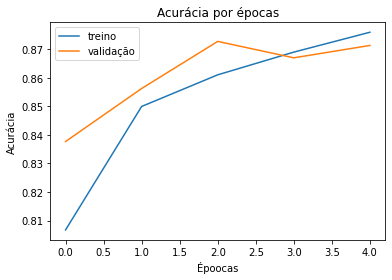

In [25]:
'''
#Plotando a acurácia por épocas
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Époocas')
plt.ylabel('Acurácia')
plt.legend(['treino', 'validação'])
'''

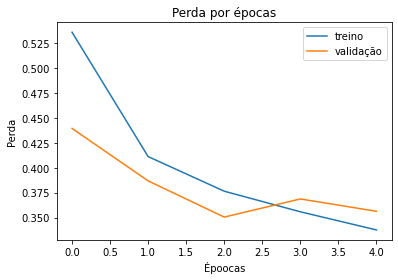

In [26]:
'''
#Plotando a perda por épocas
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('Époocas')
plt.ylabel('Perda')
plt.legend(['treino', 'validação'])
'''

  Ao zerar os pesos da camada estamos deixando o modelo simétrico, porém para que a performance seja eficaz é necessário manter a assimetria do modelo, assim mantendo as características mais importantes em destaque e o mesmo se aplica para inicializações randômicas.
  No caso dos vieses, não se nota diferença em inicializá-los zerados, pois na metodologia do modelo já é feito dessa forma por trás dos panos.

In [28]:
#Como podemos ver utilizamos o método 'Glorot Uniform', uma metodologia que aplica um meio termo entre a inicialização dos pesos zerados ou totalmente randômicos
modelo.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout',
    'trainable': True,
    'dtype': 'float32',
    'rate': 

##Finalizando o modelo

In [11]:
#Salvando o modelo
from tensorflow.keras.models import load_model

modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

In [12]:
#testando o modelo
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[0]))
print('número da imagem de teste:', identificacoes_teste[0])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste do modelo salvo:', np.argmax(testes_modelo_salvo[0]))
print('número da imagem de teste:', identificacoes_teste[0])

resultado teste: 9
número da imagem de teste: 9
resultado teste do modelo salvo: 9
número da imagem de teste: 9


In [13]:
#Métricas do modelo
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 2ms/step - loss: 51.8964 - accuracy: 0.8612
Perda do teste: 51.8963623046875
Acurácia do teste: 0.8611999750137329


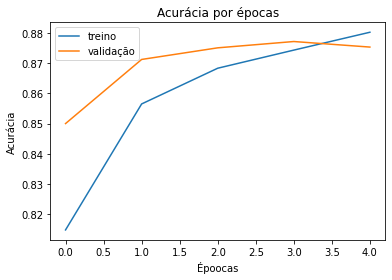

In [14]:
#Plotando a acurácia por épocas
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Époocas')
plt.ylabel('Acurácia')
plt.legend(['treino', 'validação'])

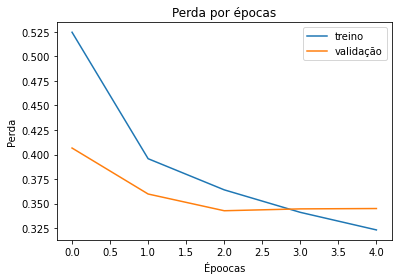

In [15]:
#Plotando a perda por épocas
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('Époocas')
plt.ylabel('Perda')
plt.legend(['treino', 'validação'])